<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_common_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to search the most discussed countries.
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- numpy
- pandas
- regex
- sys
- unicodedata
</font>

In [ ]:
# coding: utf-8
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata
import sys
sys.path.insert(1, '/Users/elenikaranikola/Desktop/NewsCleanser')
from utilities import removeAccents,normalize
from settings import countries_list

<br>
<font size="3">  
    
After installing and importing everything we need, we will write the functions that we will use in this project.
    
- **removeAccents:** removes all accents from the given string
- **normalize:** keeps only small greek letters
- **plot_barchart:** plots the given dictionaries in a bar chart 
- **calculator:** gets as input 4 dictionaries and sorts them all based on the first.
</font>
<br>

In [ ]:
#this function gets as input the countries count i all articles
#and the countries count in economics,politics,world categories
#all of which are passed as dictionaries and returns them
def calculator(countries_dict,politics_dict,world_dict,greece_dict):
    source = []
    world = []
    greece = []
    politics = []
    others = []

    for w in sorted(countries_dict, key=countries_dict.get, reverse=True):
        source.append(w)
      
    for x in source[0:10]:
        world.append(world_dict[x])
        greece.append(economics_dict[x])
        politics.append(politics_dict[x])
        others.append(countries_dict[x]-world_dict[x]-greece_dict[x]-politics_dict[x])  
    return(source[0:10],world,greece,politics,others)


#this function gets as input the countries count i all articles
#and the countries count in economics,politics,world categories
#and produces the stacked barchart   
def plot_stackedbarchart(countries_dict,politics_dict,world_dict,greece_dict):
    
    #order dictionaries based on countries_dict and get the 10 most popular countries
    ordered_lists = calculator(countries_dict,politics_dict,world_dict,greece_dict)
    source = ordered_lists[0]
    world = ordered_lists[1]
    greece = ordered_lists[2]
    politics = ordered_lists[3]
    others = ordered_lists[4]
    
    #these two lists will be needed to create the bottom for our stacked bar chart
    newgreece = []
    newpolitics = []

    #add the previous counts in the lists to get bottom    
    for i in range(10):
        newgreece.append(economics[i] + world[i])
        newpolitics.append(newgreece[i] +politics[i])
    
    #plot
    N = 10
    ind = np.arange(N)    # the x locations for the groups
    width = 0.7       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(30, 15))
    p1 = plt.bar(ind,world, width,color=('lightblue'))
    p2 = plt.bar(ind, greece, width,
                 bottom=world,color=('dodgerblue'))
    p3 = plt.bar(ind, politics, width,
                 bottom=newgreece,color=('dimgray'))
    p4 = plt.bar(ind, others, width,
                 bottom=newpolitics,color=('lightpink'))
    
    plt.ylabel('Word Count',fontsize=15)
    plt.title('Number of time each country was counted in our database',fontsize=15)
    plt.xticks(ind, source[0:10],fontsize=15)
    plt.yticks(np.arange(0, 2500, 100),fontsize=15)
    plt.legend((p1[0],p2[0],p3[0],p4[0]),('world', 'greece', 'politics', 'other'),fontsize=15)
    plt.grid(axis='y')

    plt.show()

<br>
<font size="3">
After installing and importing everything we need, we will read our data from the output.csv file. We will then create a dictionary with the countries and we will find the most popular ones in the greek journalism.
</font>
<br>
<br>

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#normalize the countries list and save the to normal_list list
normal_list = []

for x in countries_list:   
    all_in_one_string = " "
    temp = normalize(x)
    all_in_one_string = temp[0]
    for y in temp[1:]:
        all_in_one_string = all_in_one_string + " " + y
    normal_list.append(all_in_one_string)

#create a countries_dict, economics_dict, world_dict, politics_dict with key the countries name and value zero
countries_dict = {k:0 for k in normal_list}
greece_dict = {k:0 for k in normal_list}
world_dict = {k:0 for k in normal_list}
politics_dict = {k:0 for k in normal_list}

counter = 0            

for x in df['article_body']:
    
    #get a the article splitted by words in a list
    article = x
    topic = df.iloc[counter]['topic']
    counter += 1
    article_list = x.split()
    
    #rotate over each dict key and count the times it is appeared
    for y in countries_dict:
        res = re.search(rf"\b(?=\w){y}(?!\w)", article, re.IGNORECASE)
        if res != None:
            countries_dict.update({y:countries_dict[y]+1}) 
            if topic == "Greece":
                greece_dict.update({y:greece_dict[y]+1})
            elif topic == "Politics":
                politics_dict.update({y:politics_dict[y]+1})
            elif topic == "World":
                world_dict.update({y:world_dict[y]+1})       

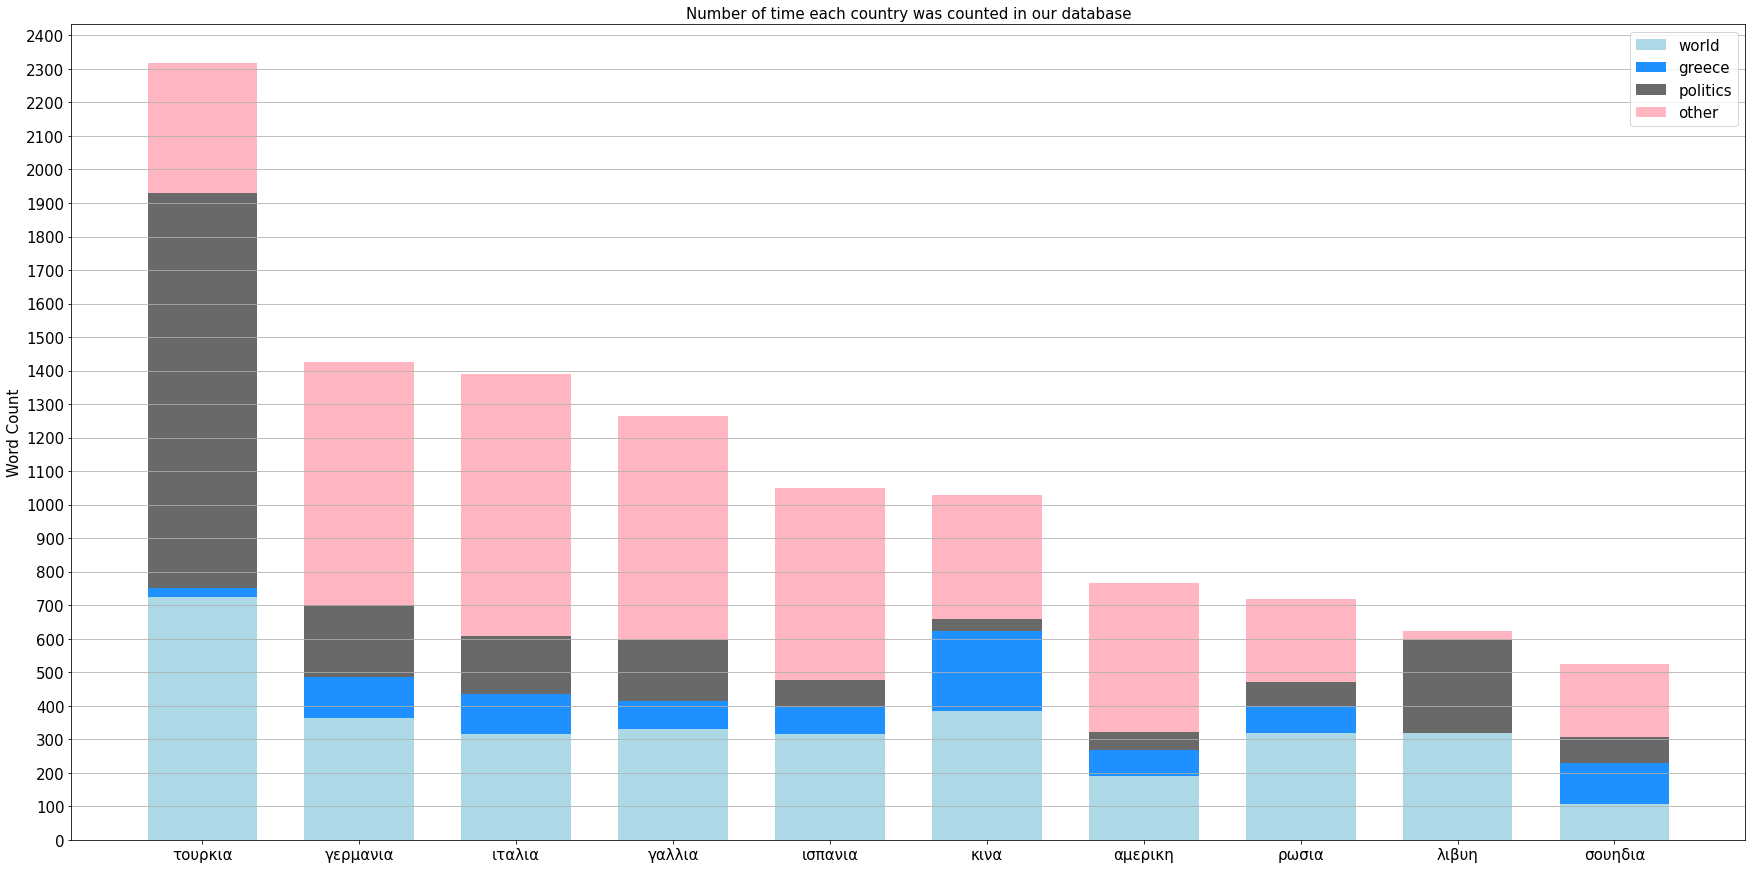

In [ ]:
plot_stackedbarchart(countries_dict,politics_dict,world_dict,economics_dict)